In [ ]:
#Bank Marketing Data Set
#https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
#The classification goal is to predict if the client will subscribe a term deposit ?
#(variable y)will be the target variable.
#There are 45000 rows and 17 columns
#classification type
#bank-full.csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd   
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
bm = pd.read_csv('bank-full.csv')

In [3]:
bm.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df1 = pd.DataFrame(bm)
df1.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df1.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
df1.y.replace(to_replace=['no', 'yes'], value=[0, 1])

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [7]:
df1['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [8]:
df1 = df1.drop('poutcome', axis=1)
#df1 = df1.drop('day', axis=1)

In [9]:
df1 = df1.drop('day', axis=1)

In [10]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,unknown,may,198,1,-1,0,no


In [11]:
df1['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

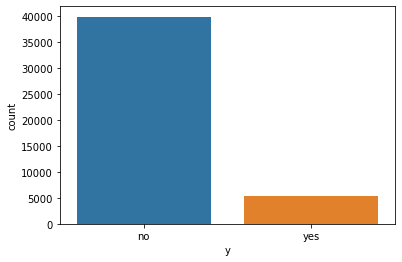

In [13]:
import seaborn as sns
sns.countplot(data=df1, x='y')

In [14]:
df1['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

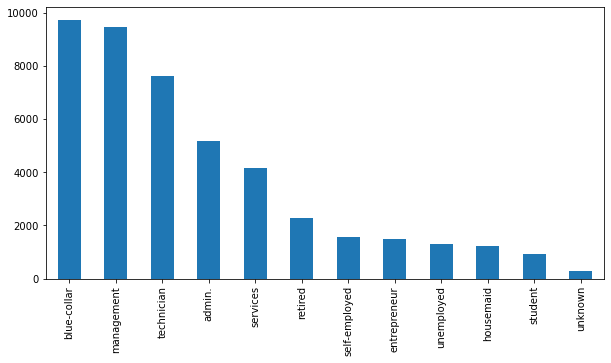

In [18]:
#sns.set_context('paper')
df1['job'].value_counts().plot(kind='bar', figsize=(10,5));

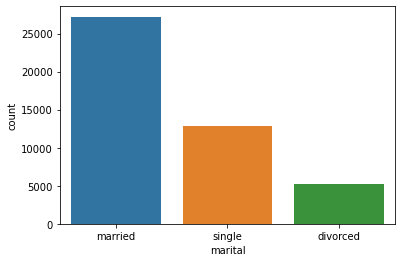

In [19]:
sns.countplot(data=df1, x='marital');

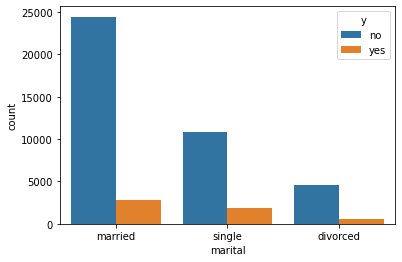

In [22]:
sns.countplot(data=df1, x='marital', hue='y');

In [23]:
job = pd.crosstab(df1['job'],df1['y'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

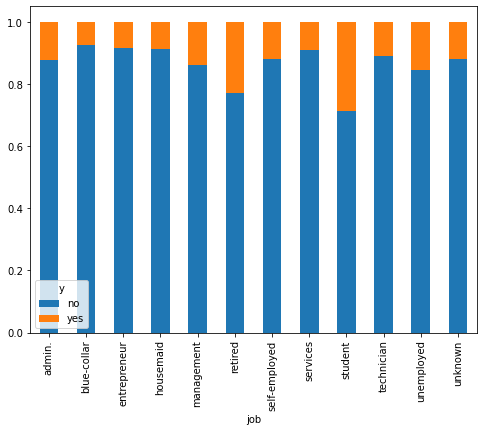

In [25]:
job_norm.plot.bar(stacked=True,figsize=(8,6));



In [26]:
df1.y.replace(to_replace=['no', 'yes'], value=[0, 1])

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [27]:
#Model Building
target_variable = df1['y']
df1 = df1.drop('y', axis=1)

In [28]:
df1 = pd.get_dummies(df1)
df1.head()

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,261,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,29,151,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,76,1,-1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,1506,92,1,-1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,33,1,198,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(df1, target_variable, test_size=0.2)

In [32]:

print(len( X_train))
print(len( y_train))
print(len( X_test))
print(len( y_test))


36168
36168
9043
9043


In [33]:
#creating an object of logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [34]:
logreg.fit(X_train,y_train)

/home/dell/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
#Making predictions on the validation set
prediction = logreg.predict(X_test)

In [39]:
# Use score method to get accuracy of model
score = logreg.score(X_test, y_test)
print(score)

0.8947252018135574


In [ ]:
#We got an accuracy score of around 89% on the validation dataset. Logistic regression has a linear decision boundary. What if our data have non linearity? We need a model that can capture this non linearity.

In [41]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy of logistic regression classifier on test set: 0.89
[[7863  158]
 [ 794  228]]


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      8021
         yes       0.59      0.22      0.32      1022

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043

